In [8]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4 as nc
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime
import os.path
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from PIL import Image
import glob
import sys
import cmocean.cm as cmo
import time
import matplotlib.image as image
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
#/glade/work/gseijo/GEBCO/zOutput_025/orig/caribean_edited_nopacific/ocean_hgrid.nc

In [3]:
ds_topo = nc.Dataset("/glade/work/gseijo/GEBCO/zOutput_025/orig/caribean_edited_nopacific/ocean_topog.nc")
bfr = ds_topo['depth'][:]

/glade/u/home/gseijo/miniconda3/envs/gridTools/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  after removing the cwd from sys.path.


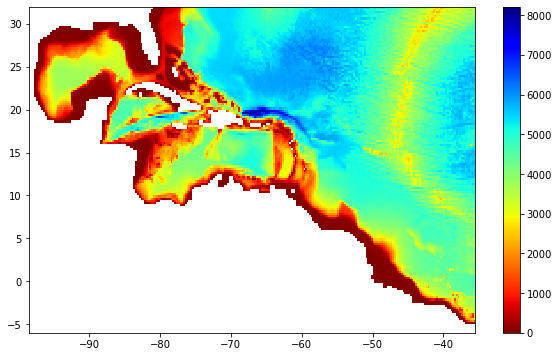

In [6]:
bfr[bfr<=0]=np.nan

figure = plt.figure(figsize=(10,6))
plt.pcolormesh(ds_topo['x'][:],ds_topo['y'][:],bfr,cmap='jet_r')
#plt.ylim(ymax = 35, ymin = 10)
#plt.xlim(xmax=170, xmin=130)
plt.colorbar()


/glade/u/home/gseijo/miniconda3/envs/gridTools/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1797: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


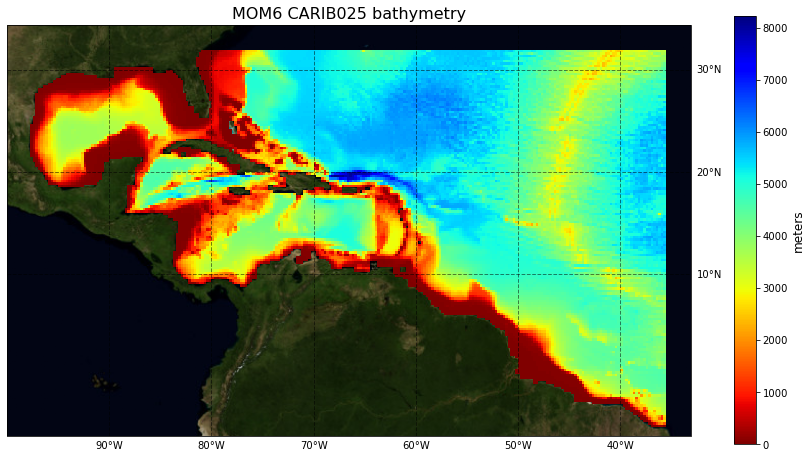

In [14]:
img = plt.imread('./bluemarble.png')
img_extent = (-180, 180, -90, 90)
figure = plt.figure(figsize=(12,12))
left = 0.01
bottom = 0.01
width = 0.99
height = 0.99
ax1 = plt.axes([left, bottom, width, height], projection=ccrs.PlateCarree(), extent=[-100, -33, -5, 30.1], facecolor='black')
#ax1 = plt.axes(projection=ccrs.PlateCarree(), extent=[-100, -33, -12, 45], facecolor='black')
ax1.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree(),vmin=0,vmax=255)
im=plt.pcolormesh(ds_topo['x'][:],ds_topo['y'][:],bfr,cmap='jet_r')
cb = plt.colorbar(im, ticks=[0,1000,2000,3000,4000,5000,6000,7000,8000],shrink=0.5)
#cb.ax.set_yticklabels(['-0.25','0','0.25']) 
cb.ax.yaxis.set_tick_params(color='k')
cb.set_label('meters', color='k', fontsize=12)
plt.title(str("MOM6 CARIB025 bathymetry"), fontsize=16, color='k')
gl = ax1.gridlines(crs=ccrs.PlateCarree(), linewidth=1, color='black', alpha=0.5, linestyle='--', draw_labels=True, x_inline=False, y_inline=False)
gl.top_labels = False
gl.left_labels = False
gl.right_labels=True
gl.bottom_labels=True
gl.xlines = True
gl.ylines = True
gl.xlocator = mticker.FixedLocator([-100,-90,-80,-70, -60, -50, -40])
gl.ylocator = mticker.FixedLocator([10, 20, 30, 40, 50])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'color': 'black', 'weight': 'normal'}
gl.ylabel_style = {'color': 'black', 'weight': 'normal'}
cb.ax.yaxis.set_tick_params(color='k')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='k')
#plt.close()
plt.savefig('/glade/work/gseijo/out_proc_Carib025.002/grid_bathy.png')

/glade/scratch/gseijo/ipykernel_164582/2246462135.py:6: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  fig=plt.pcolormesh(ocean_mask_orig['x'][:],ocean_mask_orig['y'][:],ocean_mask_orig['depth'][:],cmap='jet_r')


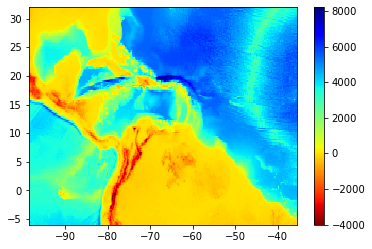

In [6]:
#create new ocean_mask.nc
# Lets look at original mask file first, for reference: 1 = ocean, 0 = land.
ocean_mask_orig = xr.open_dataset("/glade/u/home/gseijo/workdir/GEBCO/zOutput_025/INPUT2/ocean_topog.nc")
ocean_mask_orig
#lets check the mask (pacific should show as land)
fig=plt.pcolormesh(ocean_mask_orig['x'][:],ocean_mask_orig['y'][:],ocean_mask_orig['depth'][:],cmap='jet_r')
plt.colorbar()

In [9]:
ocean_mask_orig

<xarray.Dataset>
Dimensions:  (nx: 252, ny: 152)
Dimensions without coordinates: nx, ny
Data variables:
    h2       (ny, nx) float64 ...
    depth    (ny, nx) float64 ...
    x        (ny, nx) float64 ...
    y        (ny, nx) float64 ...